<a href="https://colab.research.google.com/github/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/blob/master/SVM_Kernel_Method_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVM - Kernel Method Assignment

I choose to use the Student Math Performance for this assignment. The problem is classification problem the student grade on Math of Portuguese School of the 1st year student.

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - 1 hour) 

14 studytime - weekly study time (numeric: 1 - 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - 10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) (target variable)

##Loading Dataset and Library

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid

data = pd.read_csv("https://raw.githubusercontent.com/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/master/student-mat.csv",
                   sep = ";")
data = data.copy().drop(["G2", "G3"],1)


In [220]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11


In [221]:
for i in data.keys():
    print(data[i].unique())

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]
['U' 'R']
['GT3' 'LE3']
['A' 'T']
[4 1 3 2 0]
[4 1 2 3 0]
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
[2 1 3 4]
[2 3 1 4]
[0 3 2 1]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]


* All of the variables is categorical variable which make it not a good candidate for Support Vector Machine because The SVM utilizes the kernel trick which is matrix multiplication which not make so much sense for classification
* ALso, the Target variable is multiple class which is more than 10 class and this may be hard for SVM.

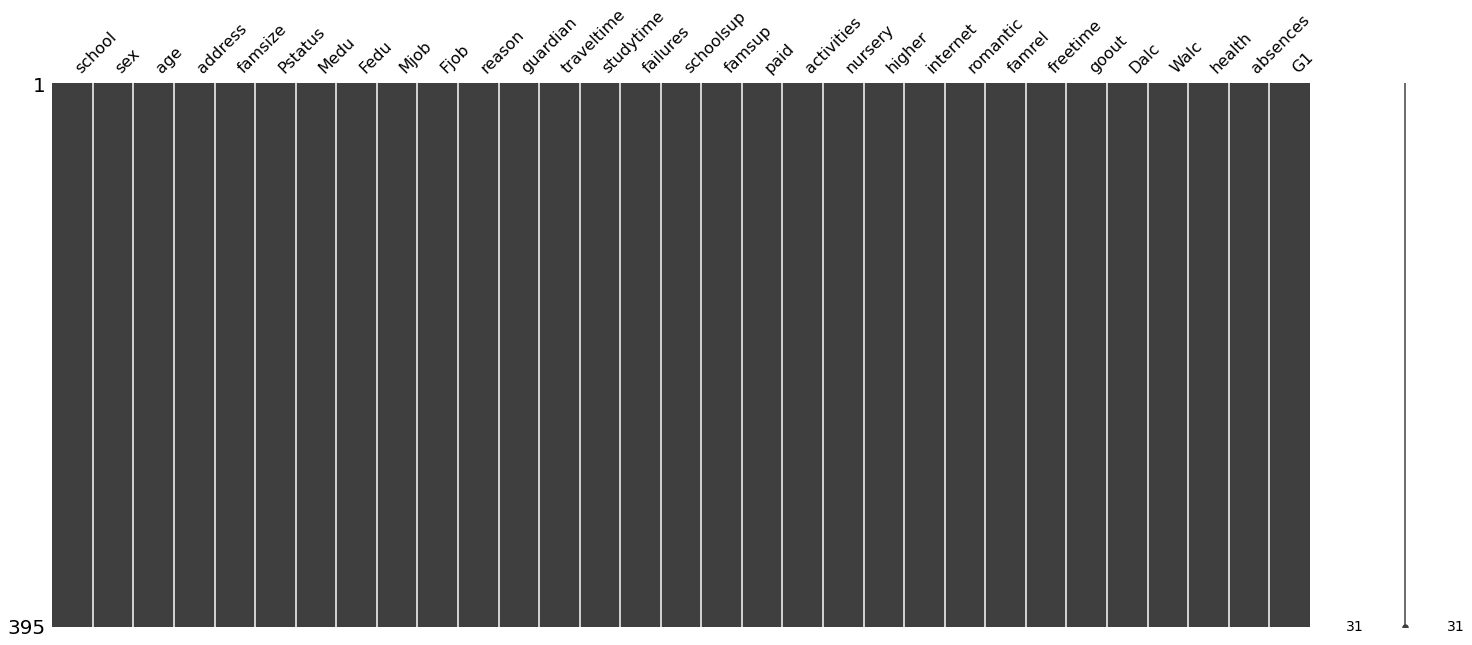

In [222]:
import missingno as miss
miss.matrix(data)
#no missing data


Counter({2: 230, 3: 95, 1: 70})


(array([ 70.,   0.,   0.,   0.,   0., 230.,   0.,   0.,   0.,  95.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

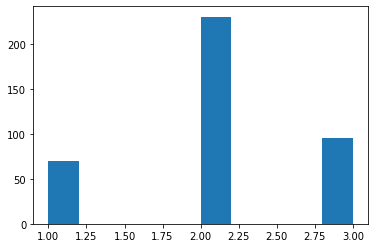

In [269]:
print(Counter(data["G1"]))
plt.hist(data["G1"])

* the data is more of center clustered
* So, as for the suppose of experimenting SVM, We would binning down the target variable in to 3 class: "good", "avg" (Average), "bad".

bad: 1-7

avg: 8-13

good: 14-20

* We choose this range because there are many data cluster at the midle so the midle range should be shorter than others to balance the data


In [268]:
#Binning the target variable
data.G1 =  data.G1.replace([1,2,3,4,5,6,7], 1)
data.G1 =  data.G1.replace([8,9,10,11,12,13], 2)
data.G1 =  data.G1.replace([14,15,16,17,18,19,20], 3)

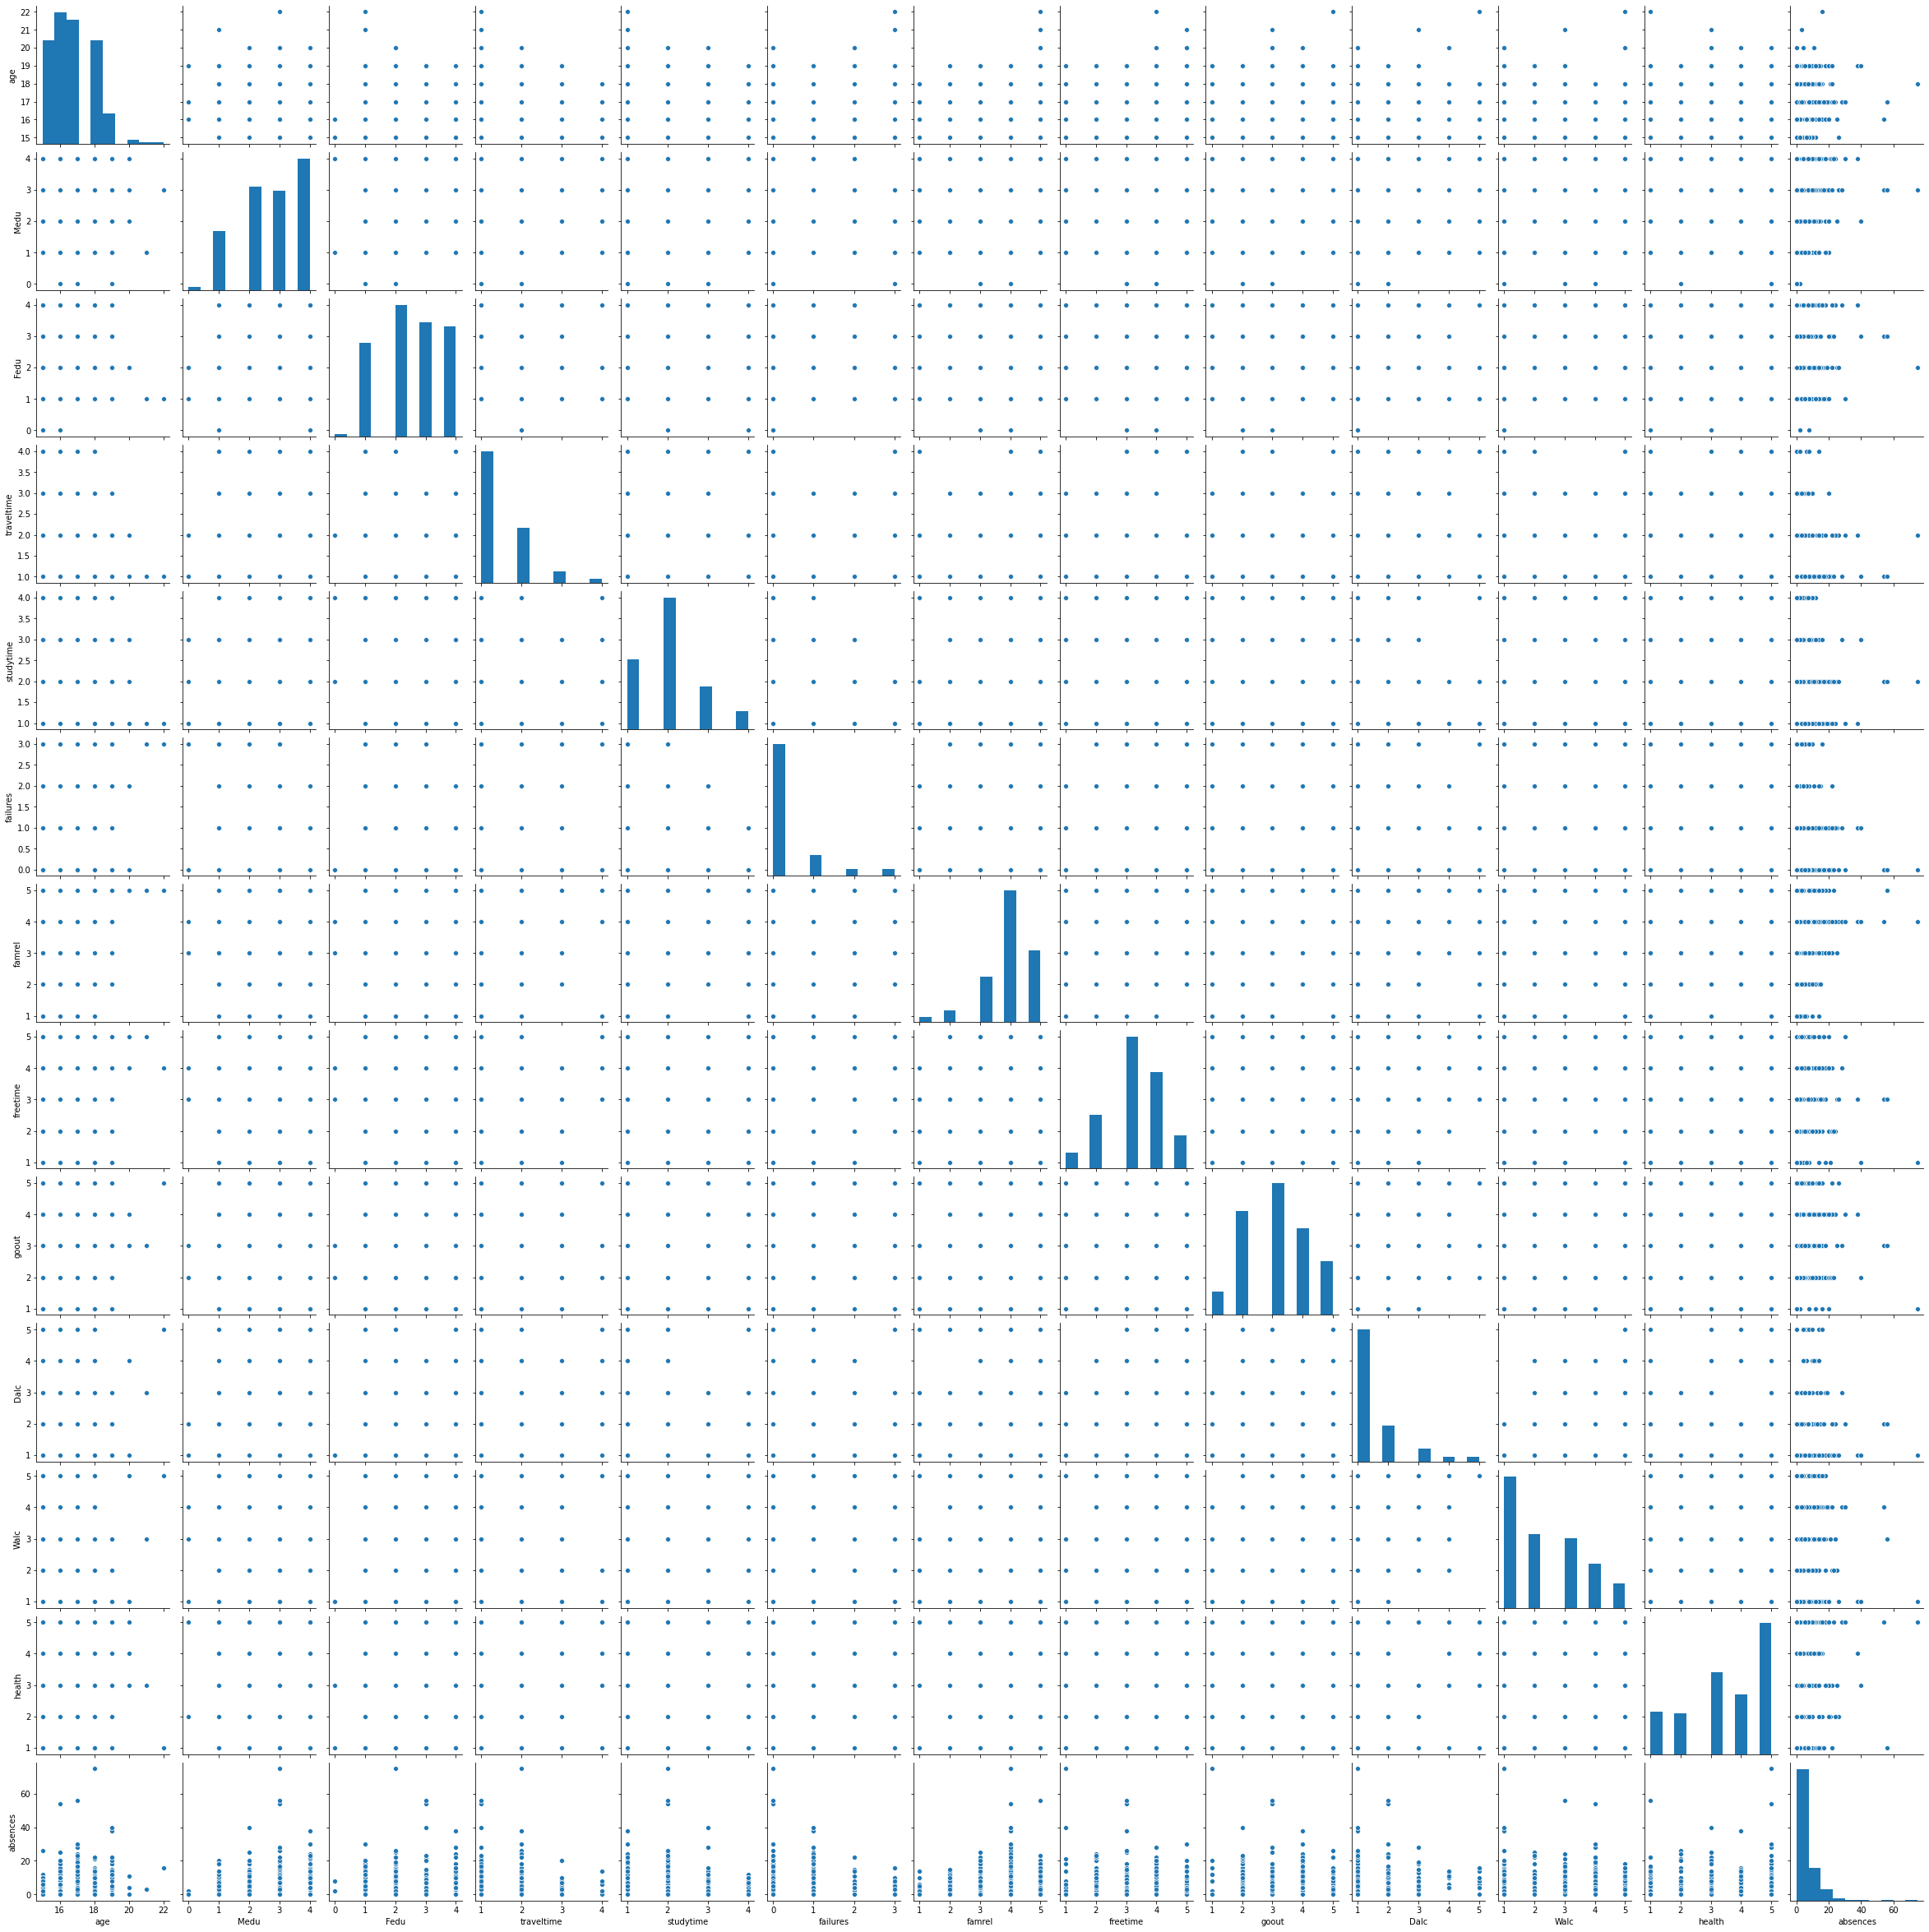

In [ ]:
sns.pairplot(data)

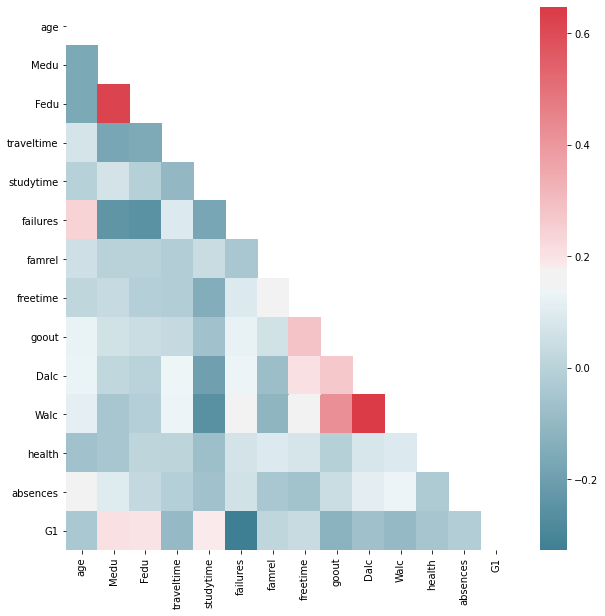

In [225]:
cor = data.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool) )
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=[10,10])
sns.heatmap(cor, mask=mask, cmap=cmap)

In [270]:
Y = data["G1"]
data.drop(["G1"],1, inplace=True)
X_train, X_test,y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state= 123)

## Support Vector Machine Models
* Since, The SVM model of Sklearn not accept the categorical input. So, we have to put some preprocessing step 
* Fortunately, There are no continuous numberical variable so no standization is needed.
1. OneHotEncoder: to encode nominal variables


In [227]:
#One Hot Encoder
X_train_OHE = pd.get_dummies(X_train,drop_first=True)
#OrdinalEncoder: to encode ordinal variables (traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health)'
X_train_OHE


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
5,16,4,3,1,2,0,5,4,2,1,2,5,10,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0
240,17,4,3,2,2,0,2,5,5,1,4,5,14,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1
241,17,4,4,2,2,0,3,3,3,2,3,4,2,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0
19,16,4,3,1,1,0,3,1,3,1,3,5,4,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
29,16,4,4,1,2,0,4,4,5,5,5,5,16,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,17,4,3,1,2,0,3,2,3,1,2,3,14,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1
98,16,4,4,1,1,0,5,3,4,1,2,1,6,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0
322,17,2,2,1,3,0,3,3,2,2,2,3,3,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0
382,17,2,3,2,2,0,4,4,3,1,1,3,2,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0


##Fitting the SVM
There are few SVM implementation on the market right now:
* SVM Light: SVM programm in C Language
* LIBSVM : library Support Vector Machine
* SVMTorch II: SVMTorch II designed for efficiently solve large-scale regression problems (more than 20000 examples). 
* SVMSequel: The underlying training algorithm used in SVMsequel is based on the kernel minover algorithm, which gives comparable performance to the more popular sequential minimal optimization (SMO) algorithms employed by most other SVM systems.
* TinySVM: TinySVM is an implementation of Support Vector Machines (SVMs) [Vapnik 95], [Vapnik 98] in 2002

In this assignment I only choose to use Sklearn SVM framework for this assignment because of these following reason:
* sklearn also have other preprocessing, cleaning and model_selection framework which make it much easier to proprocess and validate the model
* sklearn is widely used, good for industry practice
* sklearn uses the same implementation as LBSVM



###1. The Support Vector Classification with linear kernel
* the linear kernel function is simplest kernel function of SVM because it is merely the inner product of the each data point which would not create any additional space. 
* The linear kernel is:
<h2><center>$ K(x,x') = \left\langle x, x^{\prime}\right\rangle$</center></h2>

In [271]:
svm1 = svm.SVC(kernel= "linear")
svm1.fit(X_train_OHE, y_train)
score_blsvm = cross_val_score(svm1, X_train_OHE, y_train, cv = 10)
print(score_blsvm)
print("Average Score: ",score_blsvm.mean())

[0.5        0.53571429 0.53571429 0.57142857 0.5        0.42857143
 0.55555556 0.62962963 0.59259259 0.62962963]
Average Score:  0.5478835978835979


* the result is relatively poor because we only use the simple linear Kernel function, latter on we will try more kind of Kernel function

### 2. Support Vector Machine with Radial Basis Function

The RBF has the form of: <h2><center>$K(x, x') = \exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)$</center></h2>
* The $\gamma$ parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
* The $C$ parameter trades off correct classification of training examples against maximization of the decision function’s margin (regularization parameter)
* Since, It have only two parameter we will use the gridSearch to search for the optimal parameter

In [272]:
svm_rbf = svm.SVC(kernel="rbf")
para_dict = {"C" : np.logspace(-2, 10, 13), "gamma" : np.logspace(-9, 3, 13)}
grid_rbf = GridSearchCV(svm_rbf, para_dict, cv=10)
grid_rbf.fit(X_train_OHE, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [273]:
print("Best Model Score: ",grid_rbf.best_score_)

Best Model Score:  0.5904761904761905


* We see that with the RBF kernel and fine-tuning, the SVM only did a slighly better than the simplest case of itself. The reason for this is lie behind the Kernel function. The RBF is the Euclidean distance function which not make much sense when it come to Categorical data.


### 3. Support Vector Machine with Custom Kernel Function

In this section, We will try to define a better Kernel Function specified for merely categorical data.

We have the OverLap Kernel, also called Dirac Kernel and its variants. The overlap kernel would be relatively simple which just a indicator function to determine that two element are equal or not:

<h2><center>$k_{0}(\mathbf{x}, \mathbf{y})=f_{p}\left(\frac{1}{n} \sum_{i=1}^{n} f_{a}\left(\left[x_{i}=y_{i}\right]\right)\right)$</center></h2>

With:
<center><h2> $[x=y]=\left\{\begin{array}{ll}1 & \text { if } x=y \\ 0 & \text { if } x \neq y\end{array}\right.$</h2></center>

The variants of Overrlap Kernel would depend on how to subtitute the $f_{a}$ , $f_{p}$ and the indicator function $[x=y]$ with different function. Also, We would not have to specify the $f_{a}$ , $f_{p}$ at once. In this assignment, We will try two potential variants with the 
<h2><center>$f_{a} or f_{p} = f_{1}^{K}(x, y)=e^{\gamma K(x, y)}, \quad \gamma>0$</h2></center>

And the Indicator function would be subtituted as:
<h2><center>$k^{U}(x, y)=\left\{\begin{array}{ll}
\left(1-P_{X}(x)^{\alpha}\right)^{1 / \alpha}, \quad \alpha>0
& \text { if } x=y \\ 0 & \text { if } x \neq y\end{array}\right.$</h2></center>

* The first Kernel Function, $K_{1st}(x,y)$ would be:
<h2><center>$K_{1st}(x,y) =\frac{1}{n} \sum_{i=1}^{n} \exp \left(\gamma k^{U}\left(x_{i}, y_{i}\right)\right)$</h2></center>

* The second Kernel Function, $K_{2nd}(x,y)$ would be:
<h2><center>$K_{2nd}(x,y) =\exp \left(\frac{\gamma}{n} \sum_{i=1}^{n}\left[2 k^{U}\left(x_{i}, y_{i}\right)-k^{U}\left(x_{i}, x_{i}\right)-k^{U}\left(y_{i}, y_{i}\right)\right]\right)$</h2></center>


Refference: 
* https://upcommons.upc.edu/bitstream/handle/2099.1/24508/99930.pdf?sequence=1
* https://pdfs.semanticscholar.org/c6db/c55b3dc171681b332989ceb415a5e6330c18.pdf

In [231]:
#Calculate P(x): this function recieve a vector (or a feature), return a dictionary of probability
def Px(x):
    n = x.shape[0]
    cls = x.unique()
    pdict = dict()
    for name in cls:
        pdict.update({name: Counter(x)[name]/n})
    return pdict

#define P(x) matrix, This function receive a matrix and return a probability matrix
def Px_ma(x):
    for col in x:
        P = Px(x[col])
        x.replace({col : P}, inplace= True)
    return x
        

#Define Indicator Function:
#this function would return a list of matrix, the number of matrix corrensponse to the number of samples
#Why? because the Kernel is represent for a matrix if we sum all of the columns. The Kernel calculation is the row by row calculation
#evetually, one elements of the kernel would be a sumation of matching indication.
#Why is a list of matrix? because latter we will have to do some calculate before add them up together to form a kernel dimension
def ind_func(X, Y, alpha):
    list_matrix = [] 
    P_ma = (1 - Px_ma(Y) ** alpha)** (1/alpha)
    for i, row in X.iterrows():
        indi_matrix = row == Y
        list_matrix.append(np.multiply(indi_matrix , P_ma))
    return list_matrix
        
#Define the K_1st function, this will return the Kernel matrix of NxN (N is number of samples)
def K_1st(X, Y ,alpha, gamma):
    n = X.shape[0]
    K_u = ind_func(X = X,Y = Y, alpha = alpha )
    K_1 = pd.DataFrame()
    for matrix in K_u:
        K_i = np.exp(matrix*gamma).sum(axis = 1)
        K_1 = pd.concat([K_1 ,K_i], axis = "columns")
    return K_1/n


#Define the K_2nd function, this will return the Kernel matrix of NxN (N is number of samples)
#With K_u2, we only need to subtract to the x cordinate itself which mean in each matrix of ind_funct we substract each row to the corresponding row of P(x)_matrix
#With K_u3, in each matrix of ind_funct we substract the whole ind_funct matrix with the P(x)_matrix
def K_2nd(X, Y ,alpha, gamma):
    n = X.shape[0]
    K_u1 = ind_func(X = X,Y = Y, alpha = alpha )
    K_u2 = Px_ma(X)
    K_u3 = Px_ma(Y)
    K_2 = pd.DataFrame()
    for i, matrix in enumerate(K_u1):
        K_i = (2*K_u1[i]- K_u2.iloc[i,:] - K_u3).sum(axis = 1)* (gamma/n)
        K_2 = pd.concat([K_2 ,K_i], axis = "columns")
    return np.exp(K_2)





* for better calculation, We decided to drop the "absences" feature because it is a decrete numerous variables.

In [232]:
X_train_OHE = X_train_OHE.drop("absences", axis= 1)

#### Fine-Tunning the $K_{1st}(x,y)$
* Notced: We will use the gram_matrix method to custom the kernel function Which mean with any combination of Gamma and alpha there is a gram_matrix

In [280]:
gram_ma = K_1st(X_train_OHE, X_train_OHE, alpha=0.125, gamma = 0.2962962962962963)
a = svm.SVC(kernel= "precomputed", C=1000000)
a.fit(gram_ma, y_train)
#score_blsvm = cross_val_score(a, gram_ma, y_train)
a.score(gram_ma.iloc[1:250,:], y_train[1:250])

0.5783132530120482

In [281]:
alphas = np.logspace(-3,2,5, base = 1.5)
gammas = np.logspace(-3,2,5, base = 2)
C_para = {"C": np.logspace(-1,4,4), "kernel": ['precomputed']}
bestC_model = pd.DataFrame({"gamma": [], "alpha":[], "C":[] , "Accuracy": []})
for alpha in alphas:
    for gamma in gammas:
        gram_ma = K_1st(X_train_OHE, X_train_OHE, alpha=alpha, gamma = gamma)
        grid_k1st = GridSearchCV(svm.SVC(), param_grid=C_para,cv = 10)
        grid_k1st.fit(gram_ma, y_train)
        pd.concat([bestC_model, {"gamma" : gamma, 
                                 "alpha": alpha, 
                                 "C": grid_k1st.best_params_, 
                                 "Accuracy": grid_k1st.best_score_}], axis = 0)
        

TypeError: ignored

In [236]:
y_train

5      3
240    2
241    2
19     1
29     2
      ..
230    3
98     2
322    2
382    2
365    2
Name: G1, Length: 276, dtype: int64